In [1]:
import pandas_gbq
from datastory import DataStory
import plotly.express as px

In [2]:
df = pandas_gbq.read_gbq("SELECT * FROM `nais-analyse-prod-2dcc.deploys.deploys_prod_aggregated`")

Downloading: 100%|██████████| 223592/223592 [00:12<00:00, 18327.92rows/s]
/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/table.py:2009: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  df[column] = pandas.Series(df[column], dtype=dtypes[column])


In [4]:
#Filter out canaries and auto-deployed system apps
df = df[df['application'] != 'nais-deploy-canary']
df = df[df['application'] != 'testapp-storage']
df = df[df['application'] != 'kafkarator-canary']

In [14]:
df['weeknr'] = df['deployed_timestamp'].dt.isocalendar().week.astype(str)
df['weeknr'] = df['weeknr'].apply(lambda x: x.zfill(2))
df['year'] = df['deployed_timestamp'].dt.isocalendar().year.astype(str)
df['monthnr'] = df['deployed_timestamp'].dt.month.astype(str)
df['monthnr'] = df['monthnr'].apply(lambda x: x.zfill(2))
df['week'] = df['year'] + '-' + df['weeknr']
df['month'] = df['year'] + '-' + df['monthnr']

In [16]:
start = df['deployed_timestamp'].min()

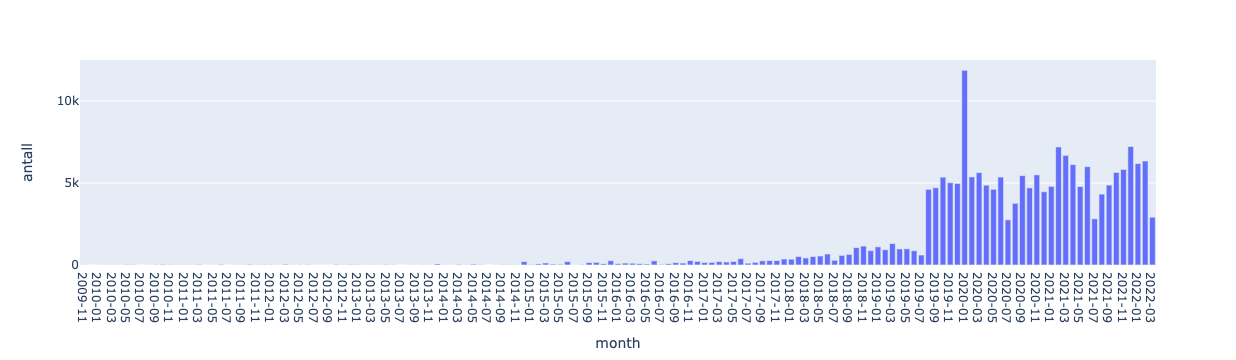

In [17]:
df_month_prod = df.groupby('month').size().reset_index(name='antall')
fig_month_prod = px.bar(df_month_prod, x='month', y='antall')
fig_month_prod.update_xaxes(type='category')
fig_month_prod.show()

In [18]:
description = f'''Deploy-dataproduct (prod) inneholder deploys til prod lest ut fra `vera` og `devrapid` i perioden fra {start.strftime("%Y-%m-%d kl %H:%M:%S")} til nå. Dataproduktet oppdateres i sanntid.'''

In [19]:
ds = DataStory("Dokumentasjon av deploy-dataproduct (prod)")

ds.header("Beskrivelse")
ds.markdown(description)
ds.header("Eksempler")
ds.header("Deploys til produksjon per måned", level=2)
ds.markdown("I denne grafen har talt opp antall deploys til produksjon per måned.")
ds.plotly(fig_month_prod.to_json())

In [20]:
#ds.publish(url="https://nada.intern.nav.no/api")
ds.update(url="https://nada.intern.nav.no/api", token='9757139d-ff2a-432d-8e32-d7672169feea')

<IPython.core.display.Javascript object>

'https://data.intern.nav.no/story/draft/e0733e67-01b7-44c2-bdf5-92dc907e7538'